<a href="https://colab.research.google.com/github/shinnew9/Apziva_practice_code/blob/main/Project3-PotentialTalents/WordEmbedding_4steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work in 2 process:
1. Rank:
The fit column is empty, and we should calculate the similarity of the search term against the job titles of the candidates using **cosine similarity**.
2. Learn how to rank:
We need labels for the 2nd part.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Necessary Package Installation

In [ ]:
!pip install wordcloud

In [ ]:
!pip install nltk

In [ ]:
# !pip install glove_python_binary
# !pip install glove-python-binary
# !pip install glove_python  # 얘도 결국은 안됌
# !pip install glove-python  # 얘도 결국은 안됌
# !pip install glove

In [ ]:
!pip install gensim

In [ ]:
# !pip install --upgrade pip setuptools wheel

#### Package Installation - SOTA

In [ ]:
!pip install huggingface_hub

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/usr/lib/python3.11/getpass.py", line 77, in unix_getpass
    passwd = _raw_input(prompt, stream, input=input)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/getpass.py", line 146, in _raw_input
   

In [ ]:
!pip install -U sentence-transformers

### Open csv

In [ ]:
# open data
import numpy as np
import pandas as pd

# text data vectorization and word embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Apziva/3rd_PotentialTalents/data.csv')
df

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


#### EDA

- add wordclouds (use python package)

In [ ]:
df.drop_duplicates() # nothing
df.isnull().sum() # nothing

,0
id,0
job_title,0
location,0
connection,0
fit,104


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [ ]:
df.describe()

,id,fit
count,104.000000,0.0
mean,52.500000,NaN
std,30.166206,NaN
min,1.000000,NaN
25%,26.750000,NaN
50%,52.500000,NaN
75%,78.250000,NaN
max,104.000000,NaN


In [ ]:
# 고유값 확인
print(df['job_title'].value_counts())

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, C

In [ ]:
print("Unique job titles:", df['job_title'].nunique())
print("Unique locations:", df['location'].nunique())

Unique job titles: 52
Unique locations: 41


In [ ]:
np.array(df['job_title'])

array(['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
       'Native English Teacher at EPIK (English Program in Korea)',
       'Aspiring Human Resources Professional',
       'People Development Coordinator at Ryan',
       'Advisory Board Member at Celal Bayar University',
       'Aspiring Human Resources Specialist',
       'Student at Humber College and Aspiring Human Resources Generalist',
       'HR Senior Specialist',
       'Student at Humber College and Aspiring Human Resources Generalist',
       'Seeking Human Resources HRIS and Generalist Positions',
       'Student at Chapman University',
       'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR',
       'Human Resources Coordinator at InterContinental Buckhead Atlanta',
       '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
       '2019 C.T. Bau

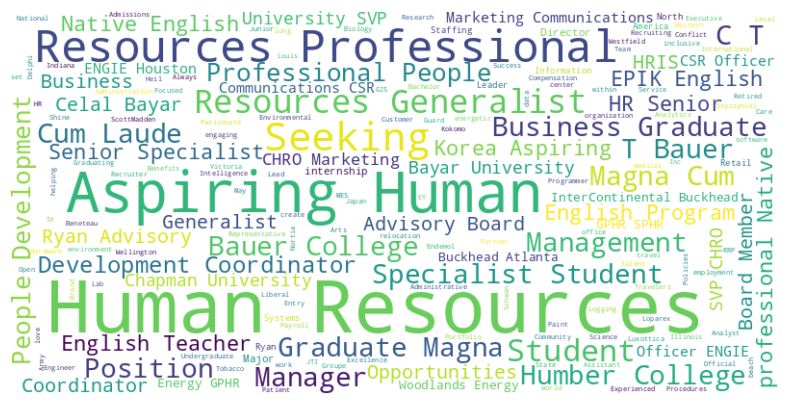

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# converting df['job_title'] into a single text
text1 = " ".join(df['job_title'].dropna().astype(str))  # 결측치 제거 및 문자열 변환

# WordCloud generate
wordcloud = WordCloud(width = 800, height=400, background_color='white').generate(text1)

# WorldCloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Data Processing

(I only vectorized in tf-idf)
1st step: Vectorization

1. Vectorization
- vectorize the job title
- vectorize the "search term" (<-- key word to retrieve candidate: either aspiring human resources or seeking human resources - I can use only one or both)
=> then I will have representation of both,

2. Calculating the cosine similarity
- calculate the cosine similarity btwn the search term and the 1st, 2nd, 3rd candidate ....
=> cosine similiarity score for every candidate

3. Sort the candidate based on the cosine similarity scores

Repeat 1, 2, 3 for every vectorization method.
- TF-IDF
- Word2Vec
- GloVe
- FastText

=> then we'll be able to see which one best suits, I should calculate the average vector representation for each (entire) job title as well as the search term.

##### TF-IDF Vectorization

In [ ]:
df_copy = df.copy()

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features = 100)  # maximum only 100 vocabularies vectorization
job_title_tfidf = tfidf_vectorizer.fit_transform(df['job_title'])

# print out
print(job_title_tfidf)

  (0, 0)	0.3170185605124362
  (0, 8)	0.3170185605124362
  (0, 16)	0.2612682279465257
  (0, 52)	0.28877539021785686
  (0, 12)	0.28105848538131334
  (0, 30)	0.3170185605124362
  (0, 43)	0.3170185605124362
  (0, 20)	0.3170185605124362
  (0, 41)	0.3170185605124362
  (0, 4)	0.20591294484361689
  (0, 5)	0.1836242557756891
  (0, 34)	0.13541184017971175
  (0, 73)	0.13541184017971175
  (0, 70)	0.23142702418699523
  (1, 49)	0.3172747467298626
  (1, 25)	0.6345494934597252
  (1, 89)	0.3172747467298626
  (1, 6)	0.14994756269306142
  (1, 26)	0.3172747467298626
  (1, 71)	0.3172747467298626
  (1, 36)	0.26748148390108084
  (1, 40)	0.3172747467298626
  (2, 5)	0.5215649714328273
  (2, 34)	0.38462278448263953
  (2, 73)	0.38462278448263953
  :	:
  (98, 34)	0.2734435636913752
  (98, 73)	0.2734435636913752
  (98, 76)	0.5160329626690806
  (98, 67)	0.7643083254750617
  (99, 5)	0.19532727713733194
  (99, 34)	0.28808422855386684
  (99, 73)	0.28808422855386684
  (99, 36)	0.3071800641873171
  (99, 76)	0.2718311521

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example data(replace this with your job_title data)
text = df['job_title'].dropna().astype(str).tolist()
# Ensure text data is a list of strings

# Initalize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(text)

# Inspect the vocabulary
vocabulary = vectorizer.get_feature_names_out()
print("Vocabulary: ", vocabulary)

Vocabulary:  ['2019' '2020' '2621' '408' '709' 'about' 'administration'
 'administrative' 'admissions' 'advisory' 'always' 'america' 'an'
 'analyst' 'analytics' 'and' 'army' 'arts' 'aspiring' 'assistant' 'at'
 'atlanta' 'bachelor' 'bauer' 'bayar' 'beach' 'benefits' 'beneteau'
 'biology' 'board' 'brand' 'buckhead' 'business' 'care' 'celal' 'center'
 'chapman' 'chro' 'college' 'communications' 'community' 'compensation'
 'conflict' 'coordinator' 'create' 'csr' 'cum' 'customer' 'data' 'delphi'
 'development' 'director' 'employment' 'endemol' 'energetic' 'energy'
 'engaging' 'engie' 'engineer' 'english' 'entry' 'environment'
 'environmental' 'epik' 'excellence' 'executive' 'experienced' 'ey'
 'focused' 'for' 'from' 'generalist' 'gis' 'gphr' 'graduate' 'graduating'
 'groupe' 'guard' 'hardware' 'heil' 'helping' 'houston' 'hr' 'hris'
 'human' 'humber' 'illinois' 'in' 'inc' 'inclusive' 'indiana'
 'information' 'intelligence' 'intercontinental' 'international'
 'internship' 'is' 'japan' 'jti' '

In [ ]:
print(tfidf_vectorizer)
print(vectorizer)

# When & When not to use Max_features:
# Use:
# the dataset is very large, and the vocabulary size is overwhelming
# you only want to focus on the most common terms, ignoring rare ones.
# Avoid max_feautres:
# Need to preserve all terms to capture the full meaning of the text
# Plan to analyze rare or domain-specific terms that might get excluded

TfidfVectorizer(max_features=100)
TfidfVectorizer()


In [ ]:
# Vectorization of Search Term
search_term1 = "Human Resources"
search_term_tfidf1 = tfidf_vectorizer.transform([search_term1])
search_term_tfidf11 = vectorizer.transform([search_term1])
print("search_term_tfidf1: \n", search_term_tfidf1)
print("search_term_tfidf11: \n", search_term_tfidf11)

search_term2 = "aspiring Human Resources"
search_term_tfidf2 = tfidf_vectorizer.transform([search_term2])
search_term_tfidf22 = vectorizer.transform([search_term2])
print("search_term_tfidf2: \n", search_term_tfidf2)
print("search_term_tfidf22: \n", search_term_tfidf22)

search_term3 = "seeking Human Resources"
search_term_tfidf3 = tfidf_vectorizer.transform([search_term3])
search_term_tfidf33 = vectorizer.transform([search_term3])
print("search_term_tfidf3: \n", search_term_tfidf3)
print("search_term_tfidf33: \n", search_term_tfidf33)



# Delete the rest of the blocks, I can change the search_term anytime so don't need to hardcode. I don't need more columns, just one column is sufficient.

search_term_tfidf1: 
   (0, 34)	0.7071067811865475
  (0, 73)	0.7071067811865475
search_term_tfidf11: 
   (0, 84)	0.7071067811865475
  (0, 155)	0.7071067811865475
search_term_tfidf2: 
   (0, 5)	0.6921061595587139
  (0, 34)	0.5103866494633691
  (0, 73)	0.5103866494633691
search_term_tfidf22: 
   (0, 18)	0.6921061595587139
  (0, 84)	0.5103866494633691
  (0, 155)	0.5103866494633691
search_term_tfidf3: 
   (0, 34)	0.424041481042877
  (0, 73)	0.424041481042877
  (0, 76)	0.800235993135729
search_term_tfidf33: 
   (0, 84)	0.424041481042877
  (0, 155)	0.424041481042877
  (0, 163)	0.800235993135729


In [ ]:
# Search Term: Human Resource
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between the searh term and all job titles
cosine_similarities1 = cosine_similarity(search_term_tfidf11, tfidf_matrix)

# Flatten the similarity matrix to get scores for each candidate
cosine_similarities1 = cosine_similarities1.flatten()

# Add the similarity scores to the DataFrame
df_copy['cosine_similarity_term1_tfidf'] = cosine_similarities1

# Sort candidates by similarity score in descending order
df_sorted = df_copy.sort_values(by='cosine_similarity_term1_tfidf', ascending=False)

# Display top candidates
print("Top Candidates for the search term: ")
print(df_sorted[['job_title', 'cosine_similarity_term1_tfidf']].head())

df_copy

Top Candidates for the search term: 
                                job_title  cosine_similarity_term1_tdidf
73           Human Resources Professional                       0.637519
57  Aspiring Human Resources Professional                       0.543939
45  Aspiring Human Resources Professional                       0.543939
20  Aspiring Human Resources Professional                       0.543939
32  Aspiring Human Resources Professional                       0.543939


,id,job_title,location,connection,fit,cosine_similarity_term1_tdidf
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.191501
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.000000
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.543939
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.000000
...,...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN,0.267815
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN,0.336065
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN,0.000000
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN,0.000000


In [ ]:
# Search Term: aspiring Human Resource
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between the searh term and all job titles
cosine_similarities2 = cosine_similarity(search_term_tfidf22, tfidf_matrix)

# Flatten the similarity matrix to get scores for each candidate
cosine_similarities2 = cosine_similarities2.flatten()

# Add the similarity scores to the DataFrame
df_copy['cosine_similarity_term2_tdidf'] = cosine_similarities2

# Sort candidates by similarity score in descending order
df_sorted = df_copy.sort_values(by='cosine_similarity_term2_tdidf', ascending=False)

# Display top candidates
print("Top Candidates for the search term: ")
print(df_sorted[['job_title', 'cosine_similarity_term2_tdidf']].head())

df_copy

Top Candidates for the search term: 
                                job_title  cosine_similarity_term2_tdidf
32  Aspiring Human Resources Professional                       0.753591
96  Aspiring Human Resources Professional                       0.753591
16  Aspiring Human Resources Professional                       0.753591
45  Aspiring Human Resources Professional                       0.753591
57  Aspiring Human Resources Professional                       0.753591


,id,job_title,location,connection,fit,cosine_similarity_term1_tdidf,cosine_similarity_term2_tdidf
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.191501,0.265312
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.000000,0.000000
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.543939,0.753591
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000,0.000000
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN,0.267815,0.282174
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN,0.336065,0.242570
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN,0.000000,0.000000
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN,0.000000,0.000000


In [ ]:
# Search Term: seeking Human Resource
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between the searh term and all job titles
cosine_similarities3 = cosine_similarity(search_term_tfidf33, tfidf_matrix)

# Flatten the similarity matrix to get scores for each candidate
cosine_similarities3 = cosine_similarities3.flatten()

# Add the similarity scores to the DataFrame
df_copy['cosine_similarity_term3_tdidf'] = cosine_similarities3

# Sort candidates by similarity score in descending order
df_sorted = df_copy.sort_values(by='cosine_similarity_term3_tdidf', ascending=False)

# Display top candidates
print("Top Candidates for the search term: ")
print(df_sorted[['job_title', 'cosine_similarity_term3_tdidf']].head())

df_copy

Top Candidates for the search term: 
                                            job_title  \
29              Seeking Human Resources Opportunities   
27              Seeking Human Resources Opportunities   
98                   Seeking Human Resources Position   
72  Aspiring Human Resources Manager, seeking inte...   
52  Seeking Human Resources HRIS and Generalist Po...   

    cosine_similarity_term3_tdidf  
29                       0.664933  
27                       0.664933  
98                       0.644851  
72                       0.573644  
52                       0.465814  


,id,job_title,location,connection,fit,cosine_similarity_term1_tdidf,cosine_similarity_term2_tdidf,cosine_similarity_term3_tdidf
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.191501,0.265312,0.114840
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.000000,0.000000,0.000000
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.543939,0.753591,0.326192
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000,0.000000,0.000000
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN,0.267815,0.282174,0.303599
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN,0.336065,0.242570,0.201533
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN,0.000000,0.000000,0.000000
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN,0.000000,0.000000,0.000000


In [ ]:
df_copy = df_copy.sort_values(by='cosine_similarity_term2_tfidf', ascending=False)
df_copy['rank_term2_tfidf'] = df_copy['cosine_similarity_term2_tfidf'].rank(ascending=False, method='dense').astype(int)
df_copy

,id,job_title,location,connection,fit,cosine_similarity_term1_tdidf,cosine_similarity_term2_tdidf,cosine_similarity_term3_tdidf,rank_term2_tdidf
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.543939,0.753591,0.326192,1
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,NaN,0.543939,0.753591,0.326192,1
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.543939,0.753591,0.326192,1
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.543939,0.753591,0.326192,1
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.543939,0.753591,0.326192,1
...,...,...,...,...,...,...,...,...,...
21,22,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000,0.000000,0.000000,31
19,20,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.000000,0.000000,0.000000,31
46,47,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000,0.000000,0.000000,31
17,18,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000,0.000000,0.000000,31


In [ ]:
df_rank = df_copy[['id', 'job_title', 'fit', 'cosine_similarity_term2_tdidf', 'rank_term2_tdidf']]
# Display results with rank
df_rank

,id,job_title,fit,cosine_similarity_term2_tdidf,rank_term2_tdidf
32,33,Aspiring Human Resources Professional,NaN,0.753591,1
96,97,Aspiring Human Resources Professional,NaN,0.753591,1
16,17,Aspiring Human Resources Professional,NaN,0.753591,1
45,46,Aspiring Human Resources Professional,NaN,0.753591,1
57,58,Aspiring Human Resources Professional,NaN,0.753591,1
...,...,...,...,...,...
21,22,People Development Coordinator at Ryan,NaN,0.000000,31
19,20,Native English Teacher at EPIK (English Progra...,NaN,0.000000,31
46,47,People Development Coordinator at Ryan,NaN,0.000000,31
17,18,People Development Coordinator at Ryan,NaN,0.000000,31


##### Word2Vec - allow me to use words as numbers, proposed by Google.


In [ ]:
# 1. CBOW (Continuous Bag of Words)
import nltk

job_title_w2v = df['job_title'].astype(str).tolist()
# Ensure that each element in job_title_w2v is a string representing the job title.
# If you are applying word_tokenize to the entire DataFrame column:

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

word_tokenize = [word_tokenize(title) for title in job_title_w2v]
print(word_tokenize[0])
# word_tokens now contains a list of lists, where each inner list represents the tokens of a job title

['2019', 'C.T', '.', 'Bauer', 'College', 'of', 'Business', 'Graduate', '(', 'Magna', 'Cum', 'Laude', ')', 'and', 'aspiring', 'Human', 'Resources', 'professional']


###### 1. CBOW: Continous Bag of Words

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model1 = Word2Vec(sentences=word_tokenize, vector_size=100, window=5, min_count=5, workers=4, sg=0) # sg = 0 means cbow
model1.wv.save_word2vec_format('word2vec_model.txt')

# Load the saved word vectors
loaded_model1 = KeyedVectors.load_word2vec_format('word2vec_model.txt', binary=False)

# Example: Test the loaded model
print(loaded_model1.most_similar('aspiring'))
print(loaded_model1.most_similar('seeking'))

[('Teacher', 0.23309385776519775), ('University', 0.17848621308803558), ('Seeking', 0.1562700718641281), ('Laude', 0.15085962414741516), ('Specialist', 0.14892138540744781), ('Resources', 0.13536764681339264), ('Magna', 0.13378207385540009), ('(', 0.13133925199508667), ('College', 0.12976126372814178), ('professional', 0.11605414003133774)]
[('at', 0.21632036566734314), ('Graduate', 0.1957860141992569), ('Cum', 0.14753085374832153), ('Magna', 0.13073322176933289), ('in', 0.12335311621427536), ('Laude', 0.12203451246023178), ('Aspiring', 0.11925811320543289), ('People', 0.11860852688550949), ('Teacher', 0.1142139881849289), ('Humber', 0.10459665954113007)]


In [ ]:
import numpy as np

# Function to compute sentence embeddings (average of word embeddings)
def get_sentence_embedding(model, sentence_tokens):
  vectors = [model.wv[word] for word in sentence_tokens if word in model.wv]
  if vectors:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(model.vector_size)

# Example usage: Calculate embedidgns for 'aspiring human resources'
sentence_tokens = ['aspiring', 'human', 'resources']
sentence_embedding1 = get_sentence_embedding(model1, sentence_tokens)
print("Sentence Embedding:", sentence_embedding1)

Sentence Embedding: [-2.5414198e-03 -5.8867563e-03  7.3222634e-03 -7.3323529e-03
 -9.2388075e-03 -2.0906923e-03 -8.0377823e-03  8.2513579e-04
  1.8020672e-03 -3.0555653e-03 -6.3549564e-03 -3.2187189e-04
 -9.3519920e-04  3.7542402e-03  8.1382012e-03  5.8118594e-03
  8.9884726e-03 -9.1386037e-03  9.3981344e-03 -3.0041896e-03
  8.6704241e-03  2.4200396e-03  3.8599065e-03 -9.8316669e-03
 -9.8628830e-03  8.9149149e-03 -3.1516212e-03  3.0308743e-03
  6.3590943e-03  2.5804409e-05  1.0339426e-02 -1.2676271e-03
 -9.3592759e-03 -7.4774283e-03 -1.1816340e-03 -8.3759958e-03
  7.4846800e-03  3.4962706e-03 -9.0234037e-03  8.5096397e-03
  8.8713709e-03  5.8906488e-03  6.8794149e-03 -9.4207563e-03
  8.1143377e-04 -9.7674550e-03 -3.6335175e-03 -9.8004304e-05
  1.5937067e-04  1.6208251e-03  3.4993161e-03  2.1170592e-03
  5.1338929e-03  7.3861661e-03 -5.7303593e-03  8.3629359e-03
  6.2854113e-03  9.9837473e-03  4.7922921e-03 -3.4852922e-03
 -3.8319316e-03 -1.0609030e-03 -1.1975160e-03  1.0104589e-02
  6.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Tokenize job titles
df_copy['tokens'] = df['job_title'].apply(lambda x:x.lower().split())

# Compute embeddings for all job titles
df_copy['cbow_embedding'] = df_copy['tokens'].apply(lambda x: get_sentence_embedding(model1, x))

# Compute embedings for all job titles
df_copy['cbow_embedding'] = df_copy['tokens'].apply(lambda x: get_sentence_embedding(model1, x))

# Compute embedding for the search term
search_term = "aspiring human resources"
search_term_tokens = search_term.lower().split()
search_term_embedding = get_sentence_embedding(model1, search_term_tokens)

# Calculate cosine similarity for each job title
# Pass the entire search_term_embedding as a list
df_copy['cosine_similarity_w2v_cbow']= df_copy['cbow_embedding'].apply(
    lambda x: cosine_similarity([x], [search_term_embedding])[0][0]
)

# Sort by similarity
df_copy = df_copy.sort_values(by='cosine_similarity_w2v_cbow', ascending=False)

# Display results
df_copy

,id,job_title,location,connection,fit,cosine_similarity_term1_tdidf,cosine_similarity_term2_tdidf,cosine_similarity_term3_tdidf,rank_term2_tdidf,tokens,cbow_embedding,cosine_similarity_w2v_cbow
78,79,Liberal Arts Major. Aspiring Human Resources A...,"Baton Rouge, Louisiana Area",7,NaN,0.214864,0.297679,0.128851,9,"[liberal, arts, major., aspiring, human, resou...","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,Lead Official at Western Illinois University,Greater Chicago Area,39,NaN,0.000000,0.000000,0.000000,31,"[lead, official, at, western, illinois, univer...","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587
89,90,Undergraduate Research Assistant at Styczynski...,Greater Atlanta Area,155,NaN,0.000000,0.000000,0.000000,31,"[undergraduate, research, assistant, at, stycz...","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587
94,95,Student at Westfield State University,"Bridgewater, Massachusetts",57,NaN,0.000000,0.000000,0.000000,31,"[student, at, westfield, state, university]","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587
10,11,Student at Chapman University,"Lake Forest, California",2,NaN,0.000000,0.000000,0.000000,31,"[student, at, chapman, university]","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587


In [ ]:
# Add a 'rank' column based on the cosine similarity score
df_copy['rank_w2v_cbow'] = df_copy['cosine_similarity_w2v_cbow'].rank(ascending=False, method='first').astype(int)
# instead of method='dense', I will use method='min', and method='first'
# df_copy
# Display results with rank
df_rank = df_copy[['id', 'job_title', 'fit', 'cosine_similarity_term2_tdidf', 'rank_term2_tdidf', 'cosine_similarity_w2v_cbow', 'rank_w2v_cbow']]
df_rank

,id,job_title,fit,cosine_similarity_term2_tdidf,rank_term2_tdidf,cosine_similarity_w2v_cbow,rank_w2v_cbow
78,79,Liberal Arts Major. Aspiring Human Resources A...,NaN,0.297679,9,1.000000,1
5,6,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,2
35,36,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,3
48,49,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,4
59,60,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,5
...,...,...,...,...,...,...,...
90,91,Lead Official at Western Illinois University,NaN,0.000000,31,-0.189587,100
89,90,Undergraduate Research Assistant at Styczynski...,NaN,0.000000,31,-0.189587,101
94,95,Student at Westfield State University,NaN,0.000000,31,-0.189587,102
10,11,Student at Chapman University,NaN,0.000000,31,-0.189587,103


###### 2. Skip-gram: predicts surrounding context words based on a given center word.

In [ ]:
# 2. Skip-gram
model2 = Word2Vec(sentences=word_tokenize, vector_size=100, window=5, min_count=5, workers=4, sg=1) # sg = 1 means skip-gram
model2.wv.save_word2vec_format('word2vec_model2.txt')

# Load the saved word vectors
loaded_model2 = KeyedVectors.load_word2vec_format('word2vec_model2.txt', binary=False)

# Example: Test the loaded model
print(loaded_model2.most_similar('aspiring'))
print(loaded_model2.most_similar('seeking'))

[('Teacher', 0.2838912904262543), ('Laude', 0.23076874017715454), ('Magna', 0.21816809475421906), ('College', 0.18723101913928986), ('(', 0.18623408675193787), ('University', 0.18430544435977936), ('Graduate', 0.1662093997001648), ('.', 0.15009033679962158), ('Specialist', 0.1485048085451126), ('Seeking', 0.14829783141613007)]
[('at', 0.23651224374771118), ('Graduate', 0.2120235413312912), ('Cum', 0.16863355040550232), ('Magna', 0.15820404887199402), ('Laude', 0.15015952289104462), ('in', 0.1358823925256729), ('Teacher', 0.13523252308368683), ('Aspiring', 0.12700553238391876), ('People', 0.1261807680130005), ('Humber', 0.11428600549697876)]


In [ ]:
sentence_embedding2 = get_sentence_embedding(model2, sentence_tokens)
print("Sentence Embedding:", sentence_embedding2)

Sentence Embedding: [-2.6575637e-03 -6.8151285e-03  6.4210529e-03 -7.9400232e-03
 -9.1705900e-03 -2.7771811e-03 -7.6987455e-03  1.4396176e-03
  1.5189494e-03 -3.8782151e-03 -6.3799857e-03 -5.0943618e-04
 -3.6315588e-04  4.5311595e-03  8.0181425e-03  5.6588775e-03
  1.0307707e-02 -1.0345776e-02  9.7593153e-03 -4.1349987e-03
  8.9910431e-03  2.7062290e-03  4.5356979e-03 -1.0119393e-02
 -1.0254946e-02  8.6575951e-03 -4.0011723e-03  3.9461600e-03
  6.4229066e-03  5.5522996e-04  1.1381713e-02 -1.1120173e-03
 -8.7102177e-03 -7.6282183e-03 -1.3708126e-03 -7.7288579e-03
  7.4440180e-03  3.0694632e-03 -9.3495464e-03  8.9366054e-03
  8.4596267e-03  6.0391678e-03  7.2201700e-03 -9.7513674e-03
  9.9259021e-04 -1.0660843e-02 -3.7861350e-03 -3.0232975e-04
  1.0152124e-03  2.0621645e-03  3.6593033e-03  2.1234949e-03
  4.9558189e-03  7.8039006e-03 -4.8557310e-03  9.0971477e-03
  6.8666097e-03  1.0570509e-02  5.2137943e-03 -3.4740278e-03
 -3.8944175e-03 -2.1166576e-03 -4.3986453e-04  1.1140017e-02
 -4.

In [ ]:
# Tokenize job titles
df_copy['tokens'] = df['job_title'].apply(lambda x:x.lower().split())

# Compute embeddings for all job titles
df_copy['sg_embedding'] = df_copy['tokens'].apply(lambda x: get_sentence_embedding(model2, x))


# Compute embedding for the search term
search_term = "aspiring human resources"
search_term_tokens = search_term.lower().split()
search_term_sg_embedding = get_sentence_embedding(model2, search_term_tokens)

# Calculate cosine similarity for each job title
# Pass the entire search_term_embedding as a list
df_copy['cosine_similarity_w2v_sg']= df_copy['sg_embedding'].apply(
    lambda x: cosine_similarity([x], [search_term_sg_embedding])[0][0]
)

# Sort by similarity
df_copy = df_copy.sort_values(by='cosine_similarity_w2v_sg', ascending=False)

# Display results
df_copy

,id,job_title,location,connection,fit,cosine_similarity_term1_tdidf,cosine_similarity_term2_tdidf,cosine_similarity_term3_tdidf,rank_term2_tdidf,tokens,cbow_embedding,cosine_similarity_w2v_cbow,rank_w2v_cbow,sg_embedding,cosine_similarity_w2v_sg
78,79,Liberal Arts Major. Aspiring Human Resources A...,"Baton Rouge, Louisiana Area",7,NaN,0.214864,0.297679,0.128851,9,"[liberal, arts, major., aspiring, human, resou...","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,1,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,3,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,4,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,5,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]","[-0.0025414198, -0.0058867563, 0.0073222634, -...",1.000000,6,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000,0.000000,0.000000,31,"[people, development, coordinator, at, ryan]","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587,78,"[-9.799321e-06, 0.0020903344, -0.00815232, -0....",-0.127243
17,18,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.000000,0.000000,0.000000,31,"[people, development, coordinator, at, ryan]","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587,77,"[-9.799321e-06, 0.0020903344, -0.00815232, -0....",-0.127243
12,13,Human Resources Coordinator at InterContinenta...,"Atlanta, Georgia",500+,NaN,0.262485,0.189461,0.157408,22,"[human, resources, coordinator, at, interconti...","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587,76,"[-9.799321e-06, 0.0020903344, -0.00815232, -0....",-0.127243
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.000000,0.000000,0.000000,31,"[advisory, board, member, at, celal, bayar, un...","[-2.3999905e-06, 0.0030400513, -0.007016533, -...",-0.189587,75,"[-9.799321e-06, 0.0020903344, -0.00815232, -0....",-0.127243


In [ ]:
# Add a 'rank' column based on the cosine similarity score
df_copy['rank_w2v_sg'] = df_copy['cosine_similarity_w2v_sg'].rank(ascending=False, method='first').astype(int)
# instead of method='dense', I will use method='min', and method='first'
# df_copy
# Display results with rank
df_rank = df_copy[['id', 'job_title', 'fit', 'cosine_similarity_term2_tdidf', 'rank_term2_tdidf', 'cosine_similarity_w2v_cbow', 'rank_w2v_cbow', 'cosine_similarity_w2v_sg', 'rank_w2v_sg']]
df_rank

,id,job_title,fit,cosine_similarity_term2_tdidf,rank_term2_tdidf,cosine_similarity_w2v_cbow,rank_w2v_cbow,cosine_similarity_w2v_sg,rank_w2v_sg
78,79,Liberal Arts Major. Aspiring Human Resources A...,NaN,0.297679,9,1.000000,1,1.000000,1
35,36,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,3,1.000000,2
48,49,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,4,1.000000,3
59,60,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,5,1.000000,4
23,24,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,6,1.000000,5
...,...,...,...,...,...,...,...,...,...
46,47,People Development Coordinator at Ryan,NaN,0.000000,31,-0.189587,78,-0.127243,100
17,18,People Development Coordinator at Ryan,NaN,0.000000,31,-0.189587,77,-0.127243,101
12,13,Human Resources Coordinator at InterContinenta...,NaN,0.189461,22,-0.189587,76,-0.127243,102
4,5,Advisory Board Member at Celal Bayar University,NaN,0.000000,31,-0.189587,75,-0.127243,103


##### GloVe - Global Vectors for Word Representation

Since the package doesn't properly get installed, I downloaded it manually and opened it manually

In [ ]:
import zipfile

# Path to the GloVe zip file
zip_file = '/content/drive/MyDrive/Apziva/3rd_PotentialTalents/glove.6B.zip'


# Specify the directory to extract files into
extract_to = "/content/drive/MyDrive/Apziva/3rd_PotentialTalents/"

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as z:
  z.extractall(extract_to)  # Extract to the specified directory

print("Unzipped files:", z.namelist())

Unzipped files: ['glove.6B.50d.txt', 'glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.300d.txt']


In [ ]:
# Open glove file
# since the package isn't downloading so does working, I will download it manually

# Glove File directory
glove_file = "/content/drive/MyDrive/Apziva/3rd_PotentialTalents/glove.6B.50d.txt"
# 6B size is fine, but be aware that the bigger the size, the more accurate I will gain

# Glove 파일 로드
def load_glove_embeddings(glove_file):
  embeddings = {}
  with open(glove_file, 'r', errors='replace') as f:   # encoding='utf-8'
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.array(values[1:], dtype='float32')
      embeddings[word] = vector
  return embeddings


# Path to the unzipped file
glove_embedding = load_glove_embeddings(glove_file)

# Test
print("Loaded embeddingss:", len(glove_embedding))
print("Vector for 'example':", glove_embedding.get('example'))

# weights of the normalized word reprsentation

Loaded embeddingss: 400000
Vector for 'example': [ 0.51564    0.56912   -0.19759    0.0080456  0.41697    0.59502
 -0.053312  -0.83222   -0.21715    0.31045    0.09352    0.35323
  0.28151   -0.35308    0.23496    0.04429    0.017109   0.0063749
 -0.01662   -0.69576    0.019819  -0.52746   -0.14011    0.21962
  0.13692   -1.2683    -0.89416   -0.1831     0.23343   -0.058254
  3.2481    -0.48794   -0.01207   -0.81645    0.21182   -0.17837
 -0.02874    0.099358  -0.14944    0.2601     0.18919    0.15022
  0.18278    0.50052   -0.025532   0.24671    0.10596    0.13612
  0.0090427  0.39962  ]


In [ ]:
# 1. Building Functions to for Sentence (Job Title and Search Term0) Embedding
# Function to calculate sentence embedding by averaging word embeddings
def get_sentence_embedding_glove(embeddings, sentence):
  words = sentence.lower().split()  # Tokenize sentence into words
  vectors = [embeddings[word]for word in words if word in embeddings]
  if vectors:
    return np.mean(vectors, axis=0) # Average of word vectors
  else:
    return np.zeros(50)  # Return a zero vector if no words are in the embeddings

In [ ]:
# 2. Job Titles and Search Term Embedding

# Calculate emebedings for all job titles
df_copy['glove_embedding'] = df['job_title'].apply(lambda x: get_sentence_embedding_glove(glove_embedding, x))

# Define the search term,
# (I defined at above, but for clarification)
search_term = "aspiring human resources"
search_term_glove_embedding = get_sentence_embedding_glove(glove_embedding, search_term)

# Verify Embeddings
print("Search Term Glove Embedding:", search_term_glove_embedding)
print("Job Title Embeddings:", df_copy['glove_embedding'].head())

Search Term Glove Embedding: [ 0.10096665  0.26641667  0.12776     0.13193001  0.56096333  0.23605335
 -0.01115533 -0.4967133   0.8192134   0.369534    0.43280664  0.24208678
  0.39948702  0.38089335  0.05536668 -0.13917334  1.01894     0.28501
  0.36602667 -0.18473966  0.02591999  0.5640493   0.18179667 -0.09233997
  0.4231     -1.00627    -0.23994665 -0.8979034  -0.18594332  0.24204533
  2.4104433   0.07153334 -0.35986602 -1.1854733  -0.30596334  0.34266332
 -0.7305843   0.08601034  0.082639   -0.155602   -0.23696798  0.09392166
  0.62479     0.16141668  0.20236667 -0.07029001 -0.36131668  0.2398329
 -0.18158667 -0.07475333]
Job Title Embeddings: 78    [-0.40183997, 0.47519302, -0.20641701, -0.1517...
35    [0.01979249, 0.2784625, -0.0133500025, 0.20498...
48    [0.01979249, 0.2784625, -0.0133500025, 0.20498...
59    [0.01979249, 0.2784625, -0.0133500025, 0.20498...
23    [0.01979249, 0.2784625, -0.0133500025, 0.20498...
Name: glove_embedding, dtype: object


In [ ]:
# 3. Calculating Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity for each job title
df_copy['cosine_similarity_glove'] = df_copy['glove_embedding'].apply(
    lambda x:cosine_similarity([x], [search_term_glove_embedding])[0][0])

# Sort job titles by similarity
df_copy = df_copy.sort_values(by='cosine_similarity_glove', ascending=False)
df_copy['rank_glove'] = df_copy['cosine_similarity_glove'].rank(ascending=False, method='first').astype(int)
df_rank = df_copy[['id', 'job_title', 'fit', 'cosine_similarity_term2_tdidf', 'rank_term2_tdidf', 'cosine_similarity_w2v_cbow', 'rank_w2v_cbow', 'cosine_similarity_w2v_sg', 'rank_w2v_sg', 'cosine_similarity_glove',	'rank_glove']]
df_rank

##### FastText

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import FastText

In [ ]:
# Tokenization (Separating by words)

tokenized_titles = [title.lower().split() for title in df.job_title]

# FastText Model Training
fasttext_model = FastText(sentences=tokenized_titles, vector_size=100, window=3, min_count=1, sg=1)  # skip-gram을 사용

# Search Term Definition
search_term = "aspiring human resources"
search_term_tokens = search_term.lower().split()
search_term_ft_embedding = fasttext_model.wv[search_term_tokens]

# sentence embedding function
def get_sentence_embedding_fasttext(model, sentence):
  vectors = [fasttext_model.wv[word] for word in sentence_tokens if word in fasttext_model.wv]
  if vectors:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(fasttext_model.vector_size)

In [ ]:
# Job Titles Embedding
job_embeddings = [get_sentence_embedding_fasttext(fasttext_model, tokens) for tokens in tokenized_titles]

# Search Term Embedding
search_embedding_ft = get_sentence_embedding_fasttext(fasttext_model, search_term_tokens)

# calculating Cosine Similarity
cosine_similarities_ft = [cosine_similarity([search_embedding_ft], [job_emb])[0][0] for job_emb in job_embeddings]

# Result
for title, similarity in zip(df.job_title, cosine_similarities_ft):
  print(f"Job Title: {title}, Cosine Similarity_ft: {similarity:.4f}")

Job Title: 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional, Cosine Similarity_ft: 1.0000
Job Title: Native English Teacher at EPIK (English Program in Korea), Cosine Similarity_ft: 1.0000
Job Title: Aspiring Human Resources Professional, Cosine Similarity_ft: 1.0000
Job Title: People Development Coordinator at Ryan, Cosine Similarity_ft: 1.0000
Job Title: Advisory Board Member at Celal Bayar University, Cosine Similarity_ft: 1.0000
Job Title: Aspiring Human Resources Specialist, Cosine Similarity_ft: 1.0000
Job Title: Student at Humber College and Aspiring Human Resources Generalist, Cosine Similarity_ft: 1.0000
Job Title: HR Senior Specialist, Cosine Similarity_ft: 1.0000
Job Title: Student at Humber College and Aspiring Human Resources Generalist, Cosine Similarity_ft: 1.0000
Job Title: Seeking Human Resources HRIS and Generalist Positions, Cosine Similarity_ft: 1.0000
Job Title: Student at Chapman University, Cosine Similarity

In [ ]:
df_copy['cosine_similarities_ft'] = cosine_similarities_ft

# Rank the job titles based on cosine similarities (highest simialrity gets rank 1)
df_copy['rank_ft'] = df_copy['cosine_similarities_ft'].rank(ascending=False, method='first').astype(int)

# Sort the DataFrame by rank
df_copy = df_copy.sort_values(by='rank_ft')

df_copy

,id,job_title,location,connection,fit,cosine_similarity_term1_tdidf,cosine_similarity_term2_tdidf,cosine_similarity_term3_tdidf,rank_term2_tdidf,tokens,...,cosine_similarity_w2v_cbow,rank_w2v_cbow,sg_embedding,cosine_similarity_w2v_sg,rank_w2v_sg,glove_embedding,cosine_similarity_glove,rank_glove,cosine_similarities_ft,rank_ft
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]",...,1.000000,4,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,3,"[0.01979249, 0.2784625, -0.0133500025, 0.20498...",0.968802,1,1.0,1
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]",...,1.000000,5,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,4,"[0.01979249, 0.2784625, -0.0133500025, 0.20498...",0.968802,2,1.0,2
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]",...,1.000000,6,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,5,"[0.01979249, 0.2784625, -0.0133500025, 0.20498...",0.968802,3,1.0,3
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]",...,1.000000,2,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,6,"[0.01979249, 0.2784625, -0.0133500025, 0.20498...",0.968802,4,1.0,4
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0.502138,0.695679,0.301125,2,"[aspiring, human, resources, specialist]",...,1.000000,3,"[-0.0026575637, -0.0068151285, 0.006421053, -0...",1.000000,2,"[0.01979249, 0.2784625, -0.0133500025, 0.20498...",0.968802,5,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,RRP Brand Portfolio Executive at JTI (Japan To...,Greater Philadelphia Area,500+,NaN,0.000000,0.000000,0.000000,31,"[rrp, brand, portfolio, executive, at, jti, (j...",...,-0.189587,99,"[-9.799321e-06, 0.0020903344, -0.00815232, -0....",-0.127243,82,"[-0.16977859, -0.07973772, -0.16956, 0.2835642...",0.414719,100,1.0,100
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.000000,0.000000,0.000000,31,"[svp,, chro,, marketing, &, communications,, c...",...,-0.050040,66,"[-0.0062594255, 0.00040910678, -0.007320977, -...",-0.008871,65,"[-0.8814959, 0.6376686, 0.45752496, 0.6580443,...",0.328956,101,1.0,101
63,64,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.000000,0.000000,0.000000,31,"[svp,, chro,, marketing, &, communications,, c...",...,-0.050040,65,"[-0.0062594255, 0.00040910678, -0.007320977, -...",-0.008871,64,"[-0.8814959, 0.6376686, 0.45752496, 0.6580443,...",0.328956,102,1.0,102
41,42,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.000000,0.000000,0.000000,31,"[svp,, chro,, marketing, &, communications,, c...",...,-0.050040,64,"[-0.0062594255, 0.00040910678, -0.007320977, -...",-0.008871,63,"[-0.8814959, 0.6376686, 0.45752496, 0.6580443,...",0.328956,103,1.0,103


In [ ]:
# df_rank

df_rank = df_copy[['id', 'job_title', 'fit', 'cosine_similarity_term2_tdidf', 'rank_term2_tdidf', 'cosine_similarity_w2v_cbow', 'rank_w2v_cbow', 'cosine_similarity_w2v_sg', 'rank_w2v_sg', 'cosine_similarity_glove',	'rank_glove', 'cosine_similarities_ft',	'rank_ft']]
df_rank

,id,job_title,fit,cosine_similarity_term2_tdidf,rank_term2_tdidf,cosine_similarity_w2v_cbow,rank_w2v_cbow,cosine_similarity_w2v_sg,rank_w2v_sg,cosine_similarity_glove,rank_glove,cosine_similarities_ft,rank_ft
48,49,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,4,1.000000,3,0.968802,1,1.0,1
59,60,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,5,1.000000,4,0.968802,2,1.0,2
23,24,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,6,1.000000,5,0.968802,3,1.0,3
5,6,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,2,1.000000,6,0.968802,4,1.0,4
35,36,Aspiring Human Resources Specialist,NaN,0.695679,2,1.000000,3,1.000000,2,0.968802,5,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,RRP Brand Portfolio Executive at JTI (Japan To...,NaN,0.000000,31,-0.189587,99,-0.127243,82,0.414719,100,1.0,100
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...",NaN,0.000000,31,-0.050040,66,-0.008871,65,0.328956,101,1.0,101
63,64,"SVP, CHRO, Marketing & Communications, CSR Off...",NaN,0.000000,31,-0.050040,65,-0.008871,64,0.328956,102,1.0,102
41,42,"SVP, CHRO, Marketing & Communications, CSR Off...",NaN,0.000000,31,-0.050040,64,-0.008871,63,0.328956,103,1.0,103


##### WordEmbedding using BERT

In [ ]:
# pre-trained model(small-size) load
# model1 = SentenceTransformer('sentence-transformers/all_MiniLM-L6-v2')
model1 = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# Text data

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]